In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [5]:
dataset = pd.read_csv('/home/alex/Documents/DS-Online-59/Proyectos/TS_17_18_19_h.csv', sep =',')
dataset['fecha2'] = pd.to_datetime(dataset.fecha)
dataset.drop(columns=['fecha'], inplace = True)
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 

print('Tamaño del dataset: ', dataset.shape)
print('\n')
print(dataset.head())


Tamaño del dataset:  (238869, 5)


       dia    sentido tipo_vehiculo  cantidad_pasos      fecha
0  Domingo  Provincia        Pesado               1 2017-01-01
1  Domingo  Provincia       Liviano               9 2017-01-01
2  Domingo  Provincia       Liviano             644 2017-01-01
3  Domingo  Provincia        Pesado               6 2017-01-01
4  Domingo  Provincia        Pesado               1 2017-01-01


(238869, 5)

In [6]:
dataset = dataset.groupby(['fecha','dia','sentido','tipo_vehiculo'])['cantidad_pasos'].sum().reset_index()

dataset['year'] = dataset['fecha'].dt.year
dataset['month'] = dataset['fecha'].dt.month
dataset['hour'] = dataset['fecha'].dt.hour

print('Dataset sin variable "forma_pago"')
print(dataset.head())

Dataset sin variable "forma_pago"
                fecha      dia    sentido tipo_vehiculo  cantidad_pasos  year  \
0 2017-01-01 00:00:00  Domingo     Centro       Liviano             880  2017   
1 2017-01-01 00:00:00  Domingo     Centro        Pesado              33  2017   
2 2017-01-01 00:00:00  Domingo  Provincia       Liviano             653  2017   
3 2017-01-01 00:00:00  Domingo  Provincia        Pesado              10  2017   
4 2017-01-01 01:00:00  Domingo     Centro       Liviano               1  2017   

   month  hour  
0      1     0  
1      1     0  
2      1     0  
3      1     0  
4      1     1  


In [7]:
hora = dataset.resample('H', on = 'fecha').sum()
hora = hora.drop(columns=['year', 'month', 'hour'])

In [8]:
print('- Hora: ', hora.shape)

- Hora:  (26280, 1)


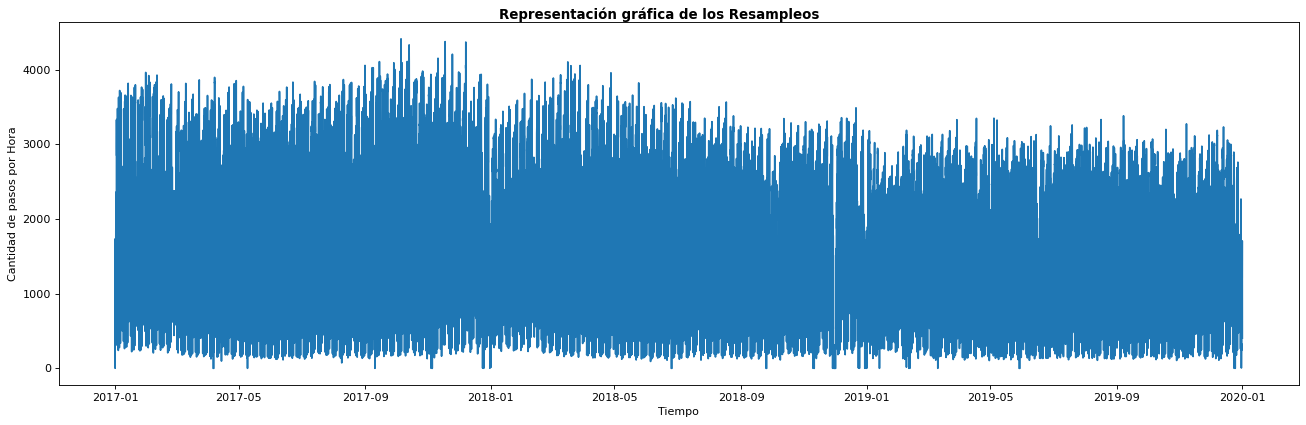

In [13]:
fig, axes = plt.subplots(figsize=(20,6), dpi= 80)

axes.plot(hora.index, hora.cantidad_pasos)
axes.set_xlabel('Tiempo')
axes.set_ylabel('Cantidad de pasos por Hora')

fig.suptitle('Representación gráfica de los Resampleos',fontweight ="bold", y=0.91)
plt.show()

In [14]:
senial = hora.cantidad_pasos
senial.shape

(26280,)

In [15]:
look_back = 48

In [16]:
N = senial.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print('Tamaño de matriz X: ', X.shape)
print('Tamaño de vector Y: ', y.shape)

Tamaño de matriz X:  (26231, 48)
Tamaño de vector Y:  (26231,)


In [17]:
for i in range(X.shape[0]):
    X[i,:] = senial.iloc[i:i+look_back]
    y[i] = senial.iloc[i+look_back]

In [18]:
print(X)

[[1.576e+03 1.000e+00 1.374e+03 ... 1.978e+03 1.604e+03 1.283e+03]
 [1.000e+00 1.374e+03 1.734e+03 ... 1.604e+03 1.283e+03 8.270e+02]
 [1.374e+03 1.734e+03 1.247e+03 ... 1.283e+03 8.270e+02 7.430e+02]
 ...
 [1.792e+03 1.547e+03 1.208e+03 ... 1.257e+03 1.235e+03 1.217e+03]
 [1.547e+03 1.208e+03 9.280e+02 ... 1.235e+03 1.217e+03 1.374e+03]
 [1.208e+03 9.280e+02 6.800e+02 ... 1.217e+03 1.374e+03 1.706e+03]]


In [19]:
print(y)

[ 827.  743.  457. ... 1374. 1706. 1139.]


In [20]:
N_test = 2160 # Ultimo trimestre 2019
N_train = senial.shape[0] - N_test - look_back -1 # cantidad de instancias que vamos a usar para entrenar. 
N_total = N_train + N_test

length_total = N_train + N_test + look_back

In [21]:
X_train = X[:N_train,:]
y_train = y[:N_train]
print('Dataset de Train: ', X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print('Dataset de Test: ', X_test.shape, y_test.shape)

Dataset de Train:  (24071, 48) (24071,)
Dataset de Test:  (2160, 48) (2160,)


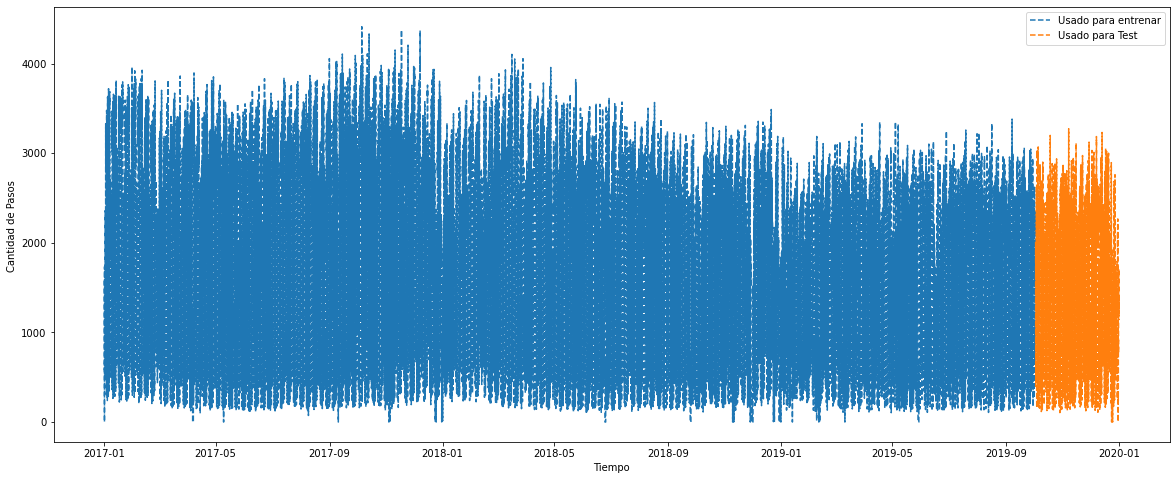

In [43]:
plt.figure(figsize=(20,8))
#plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[N_train+look_back: length_total], senial[N_train+look_back: length_total],'--', label = 'Usado para Test')
#plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
#plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de Pasos ')

#plt.xlim(datetime.date('2019-09-01'), datetime.date('2020-01-01'))
#plt.xlim(6600,6935)

plt.show()